# Fashion MNIST

Please find below the tables representing different combinations of hyper-parameters and their respective results.

**MLP: 2 Hidden Layers**
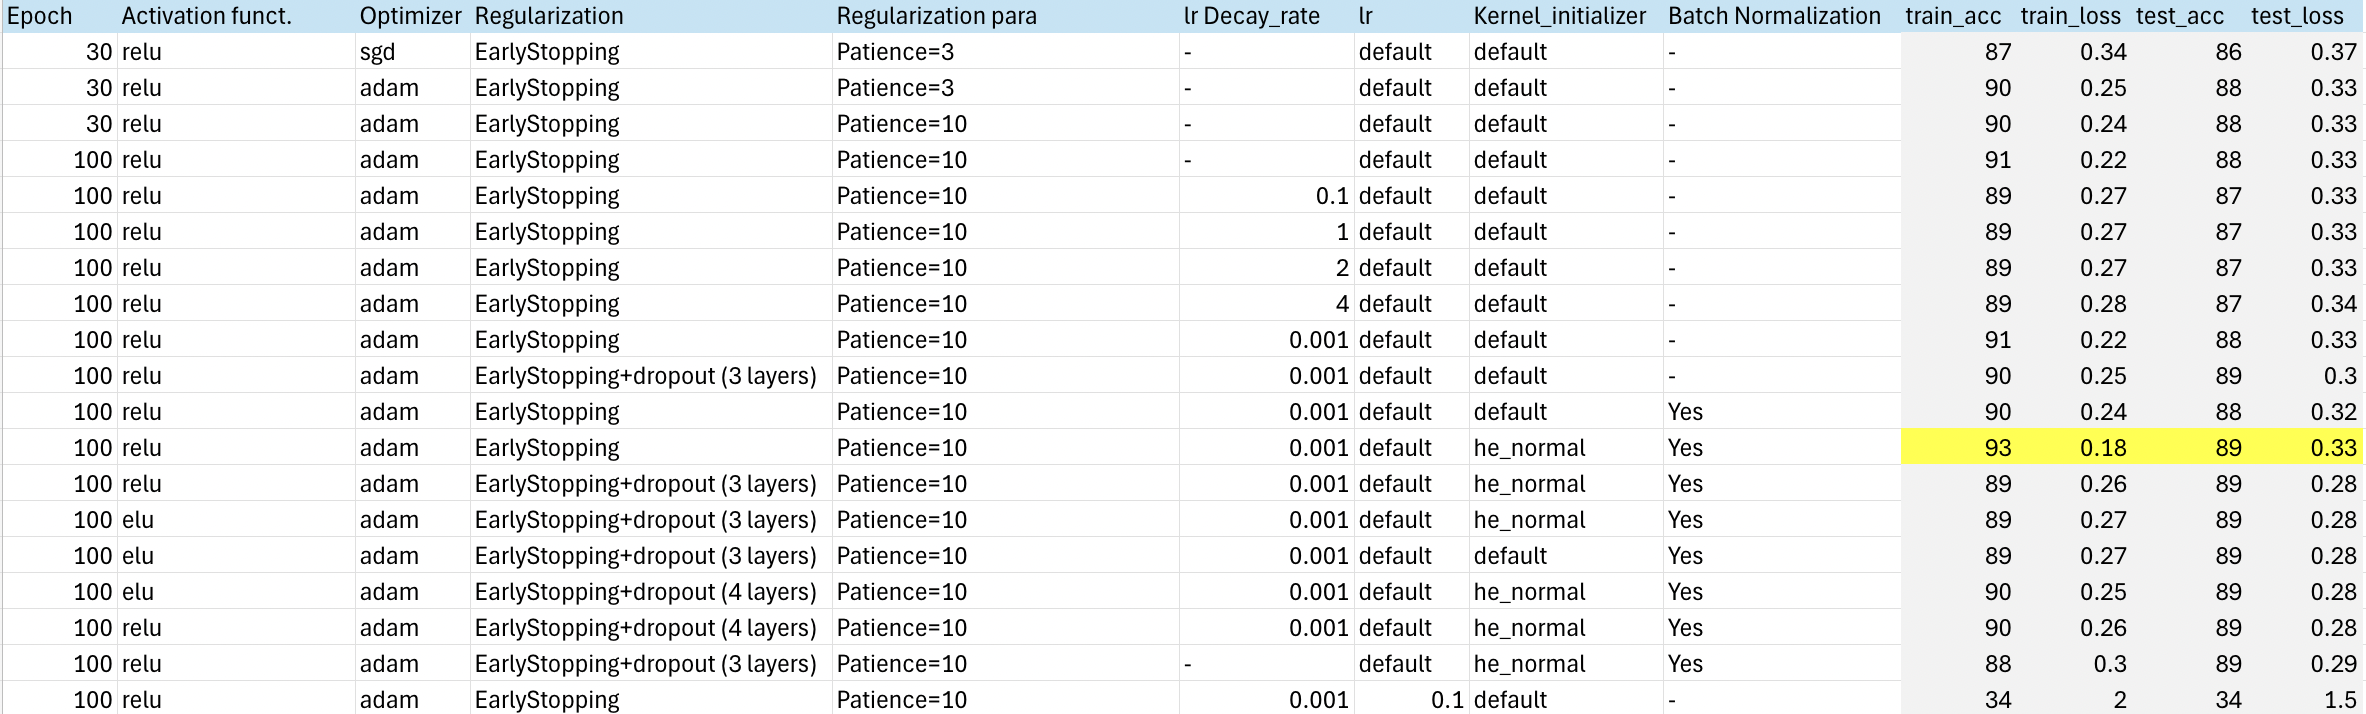

**MLP: 4 Hidden Layers**
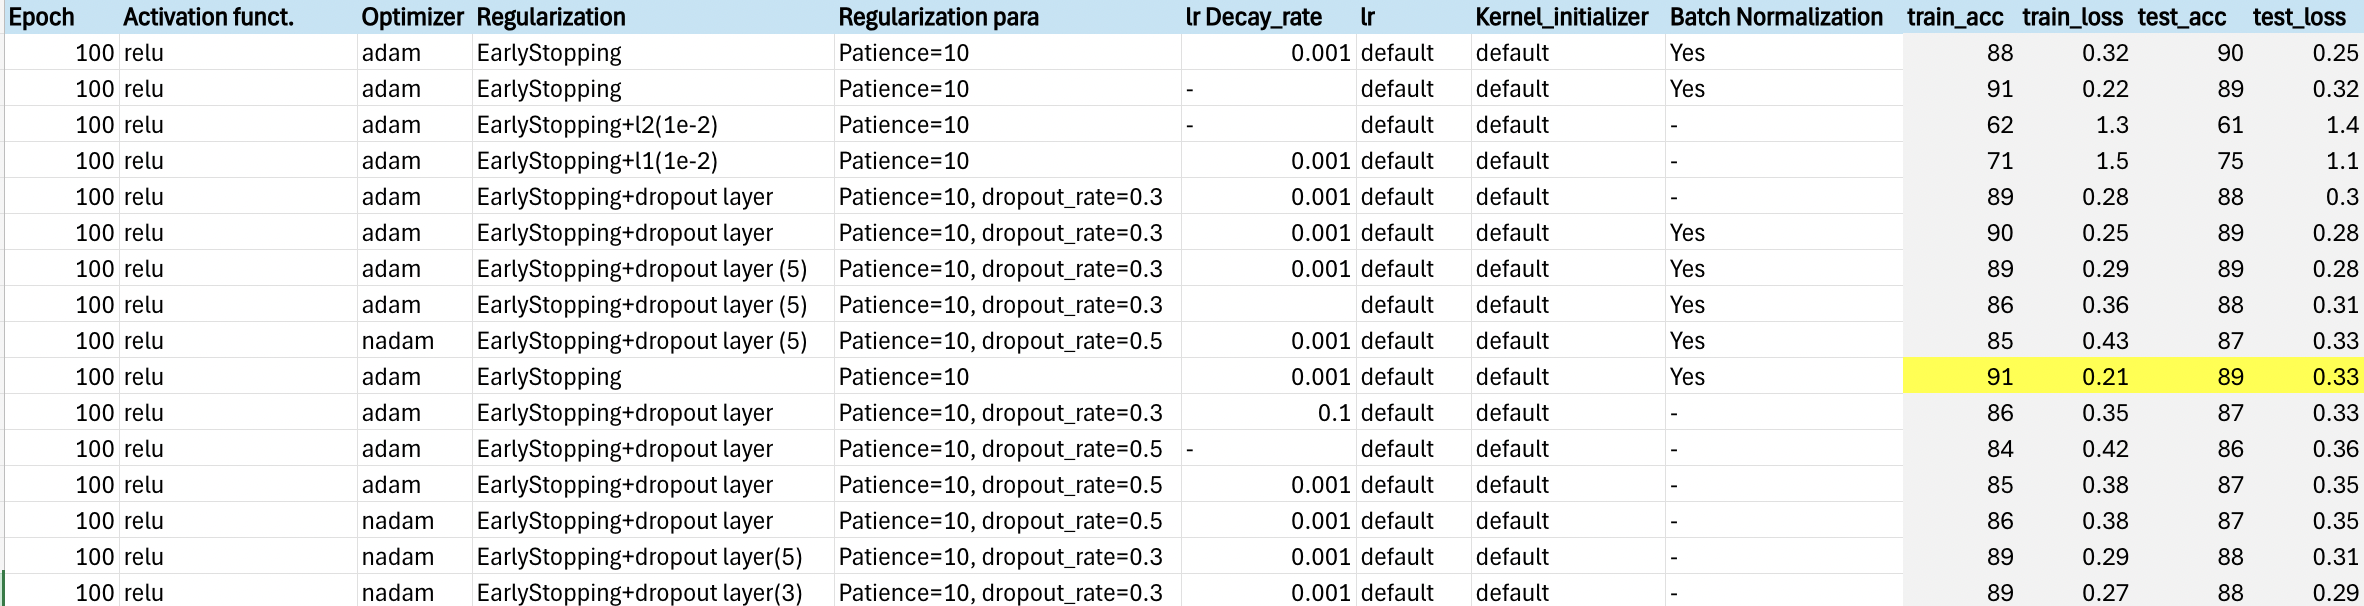

**MLP: 8 Hidden Layers**
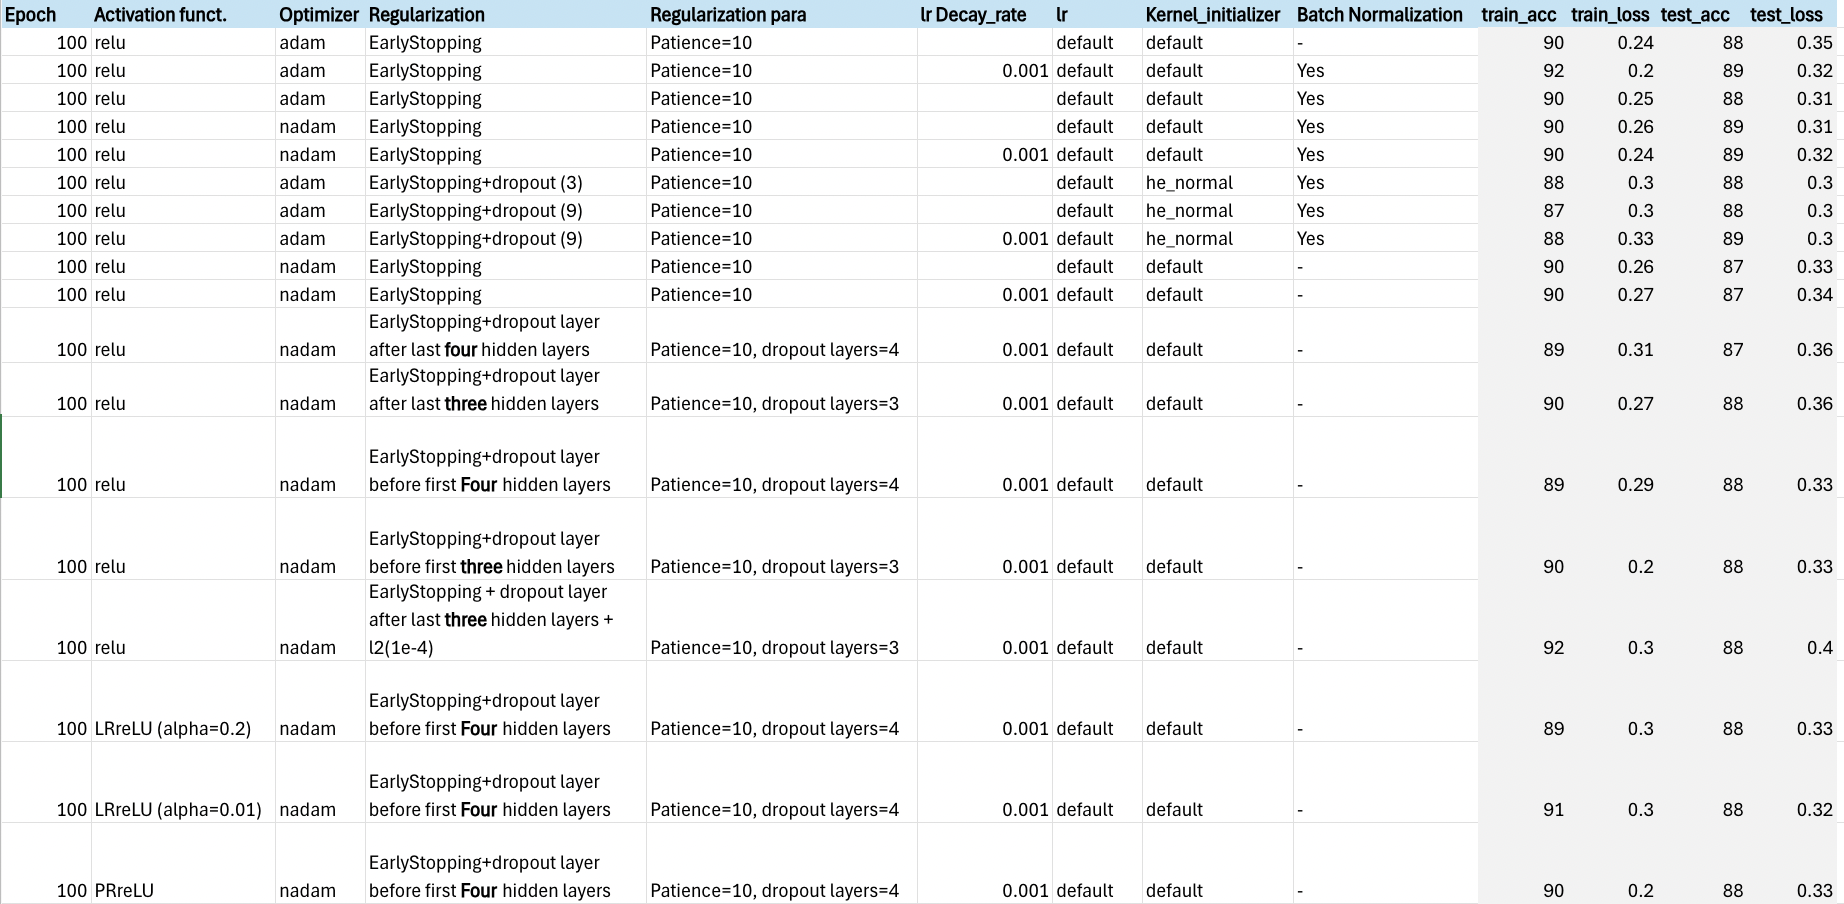

**CNN: 8 Hidden Layers**
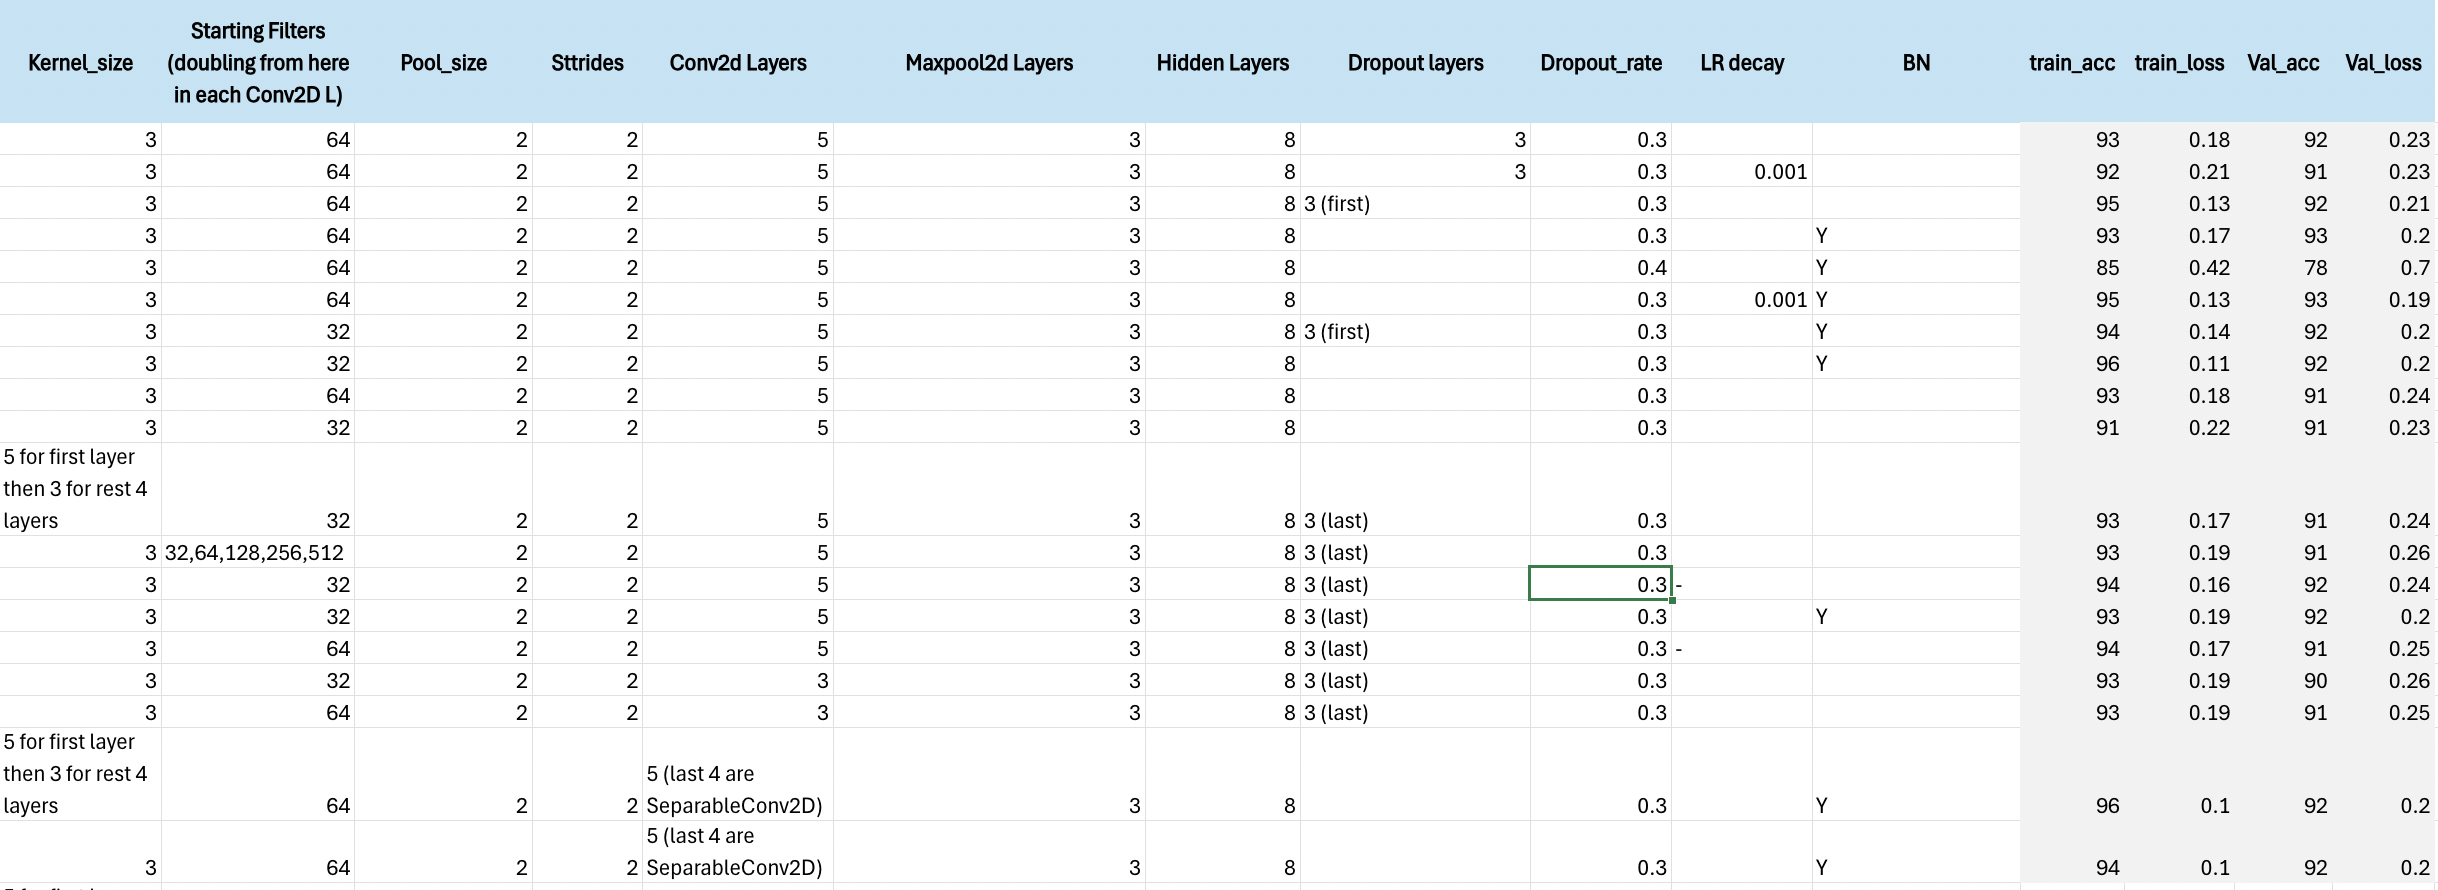

# Code for Fashion MNIST
We only included model with best hyperparameter.

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from functools import partial
from tensorflow.keras.regularizers import l2,l1

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
print (fashion_mnist)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

class_weight_dict = dict(zip(classes, class_weights))

print(class_weight_dict)

x_train = x_train/255.0
x_test = x_test/255.0

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


In [ ]:
hlayer=partial(keras.layers.Dense,activation='relu') #kernel_initializer='he_normal',kernel_regularizer=l1(0.01)
dlayer=partial(keras.layers.Dropout,rate=0.3)
clayer=partial(keras.layers.Conv2D,kernel_size=3, activation='relu',padding='same')
slayer=partial(keras.layers.SeparableConv2D,kernel_size=3, activation='relu',padding='same')
player=partial(keras.layers.MaxPooling2D,pool_size=2, strides=2)
model = keras.models.Sequential([
clayer(filters=64,kernel_size=3,input_shape=[28,28,1]),
player(),
clayer(filters=128),
clayer(filters=128),
player(),
clayer(filters=256),
clayer(filters=256),
player(),
keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
hlayer(300),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(100),
    keras.layers.BatchNormalization(),
hlayer(10,activation='softmax')
])

# Power scheduling
def decay_rate(epoch,lr):
  decay = 1e-3
  return lr/(1+decay*epoch)

# optimizer=keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
decay_lr=keras.callbacks.LearningRateScheduler(decay_rate)
history = model.fit(x_train,y_train,epochs=100,validation_split=0.1,class_weight=class_weight_dict,callbacks=[early_stopping,decay_lr])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.6514 - loss: 0.9817 - val_accuracy: 0.8452 - val_loss: 0.4276 - learning_rate: 0.0010
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8427 - loss: 0.4451 - val_accuracy: 0.8438 - val_loss: 0.4063 - learning_rate: 9.9900e-04
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8658 - loss: 0.3741 - val_accuracy: 0.8857 - val_loss: 0.3277 - learning_rate: 9.9701e-04
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.8888 - loss: 0.3208 - val_accuracy: 0.8663 - val_loss: 0.3323 - learning_rate: 9.9403e-04
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8955 - loss: 0.2963 - val_accuracy: 0.8958 - val_loss: 0.2894 - learning_rate: 9.9006e-04
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9087 - loss: 0.2629 - val_accuracy: 0.9128 - val_loss: 0.2402 - learning_rate: 9.8514e-04
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━

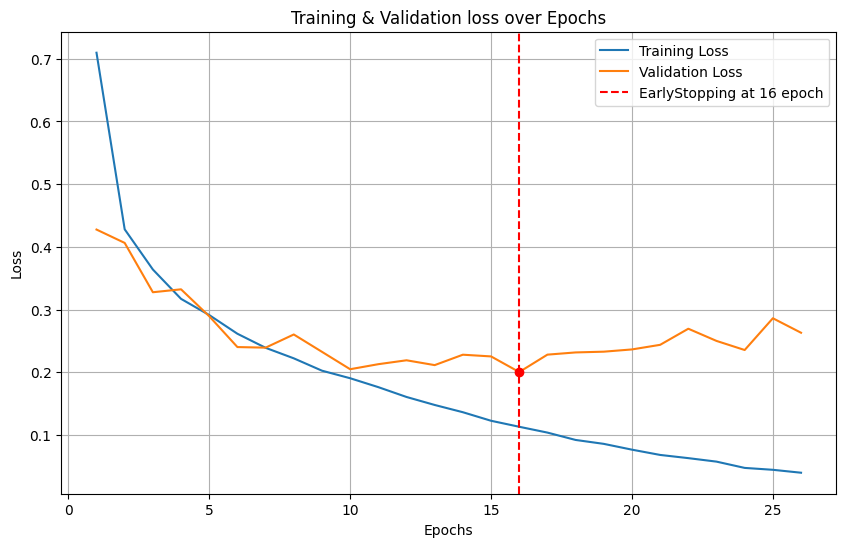

In [ ]:
ep=range(1,len(history.history['val_loss'])+1)
plt.figure(figsize=(10,6))
plt.plot(ep,history.history['loss'],label='Training Loss')
plt.plot(ep,history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axvline(x=16,linestyle='--',color='r',label='EarlyStopping at 16 epoch')
plt.scatter(16,history.history['val_loss'][15],zorder=5,color='r')
plt.grid(True)
plt.legend()
plt.title('Training & Validation loss over Epochs')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9241 - loss: 0.2474


[0.23238562047481537, 0.9254999756813049]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


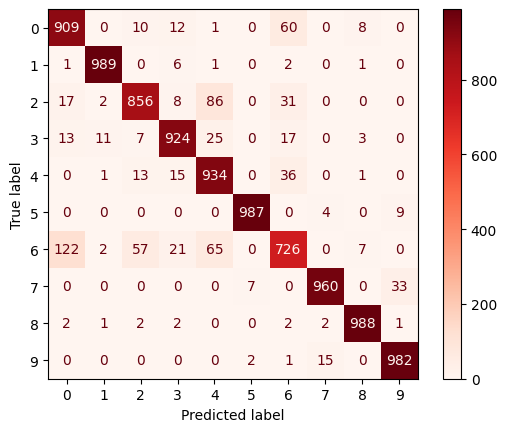

In [ ]:
y_pred=model.predict(x_test).argmax(axis=1)
c=confusion_matrix(y_test,y_pred)
p=ConfusionMatrixDisplay(confusion_matrix=c)
p.plot(cmap='Reds')

In [ ]:
cl=classification_report(y_test,y_pred,output_dict=True)
report=pd.DataFrame.from_dict(cl).T
print(report)

              precision  recall  f1-score     support
0              0.854323  0.9090  0.880814   1000.0000
1              0.983101  0.9890  0.986042   1000.0000
2              0.905820  0.8560  0.880206   1000.0000
3              0.935223  0.9240  0.929577   1000.0000
4              0.839928  0.9340  0.884470   1000.0000
5              0.990964  0.9870  0.988978   1000.0000
6              0.829714  0.7260  0.774400   1000.0000
7              0.978593  0.9600  0.969207   1000.0000
8              0.980159  0.9880  0.984064   1000.0000
9              0.958049  0.9820  0.969877   1000.0000
accuracy       0.925500  0.9255  0.925500      0.9255
macro avg      0.925587  0.9255  0.924763  10000.0000
weighted avg   0.925587  0.9255  0.924763  10000.0000


# CIFAR10

Please find below the tables representing different combinations of hyper-parameters and their respective results.

**CIFAR10**
**CNN: 8 Hidden Layers**
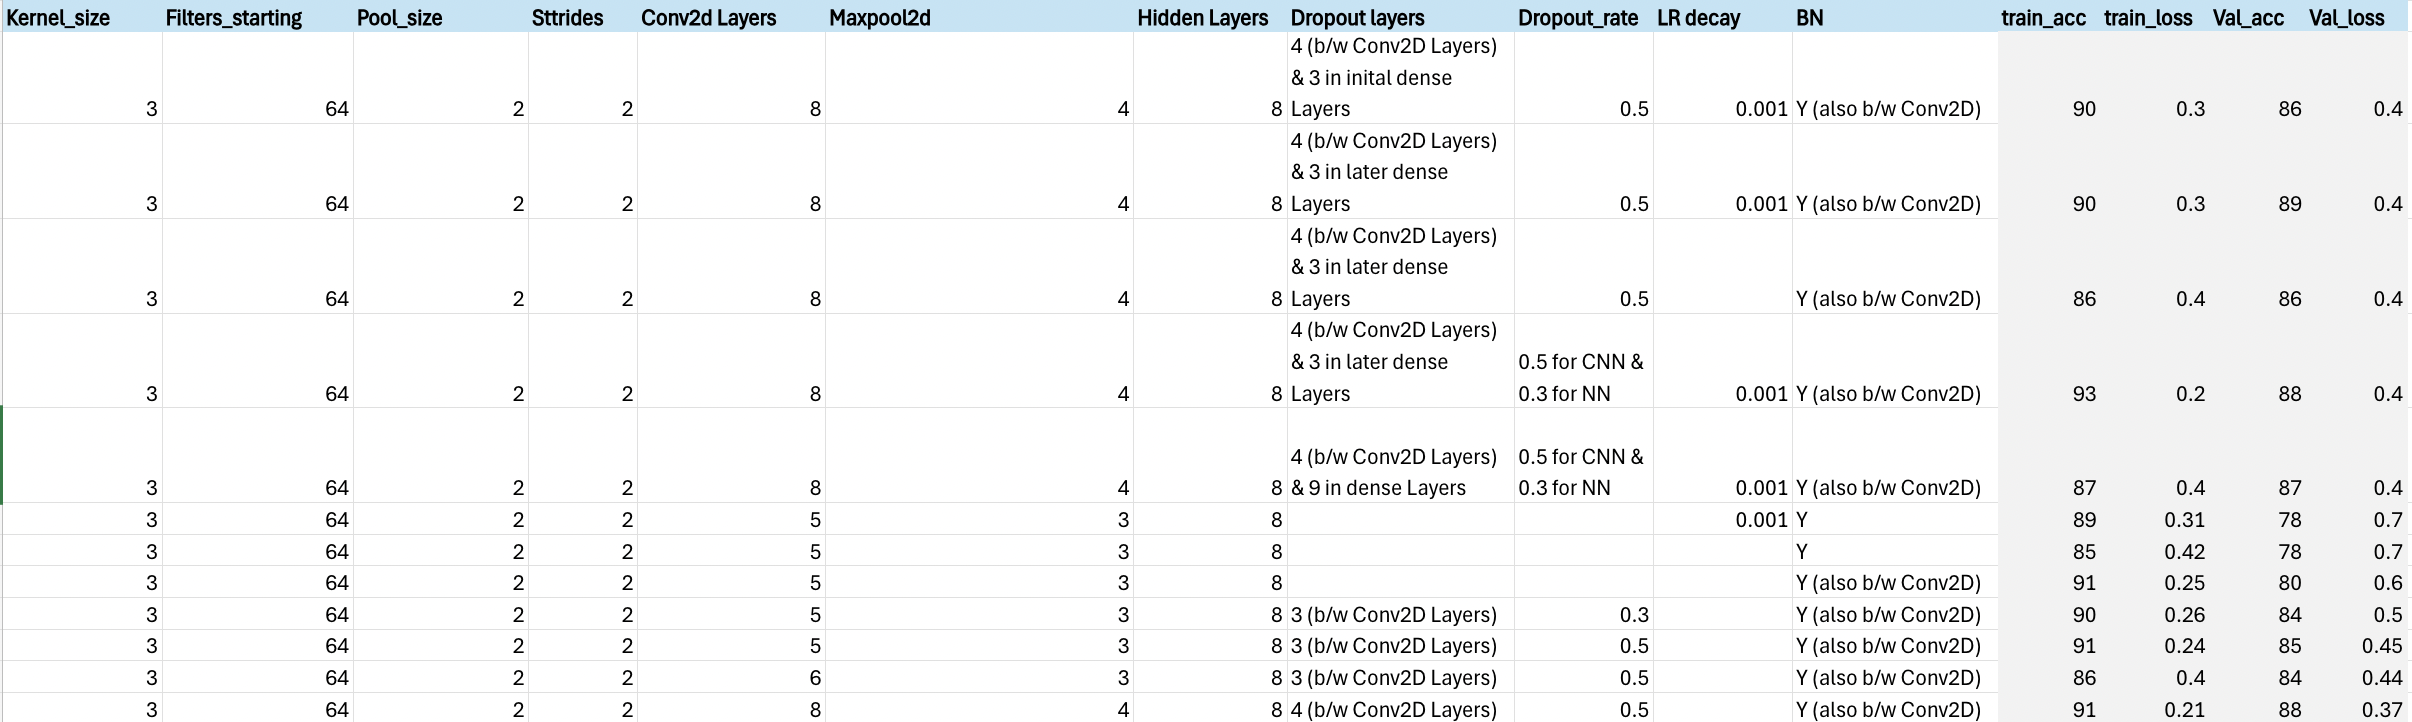

# Code for CIFAR10
We only included model with best hyperparameter.

In [2]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train_=y_train.flatten()
classes = np.unique(y_train_)

class_weights = compute_class_weight('balanced', classes=classes, y=y_train_)

class_weight_dict = dict(zip(classes, class_weights))

print(class_weight_dict)

x_train = x_train/255.0
x_test = x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}


In [3]:
hlayer=partial(keras.layers.Dense,activation='relu') #kernel_initializer='he_normal',kernel_regularizer=l1(0.01)
dlayer=partial(keras.layers.Dropout,rate=0.5)
clayer=partial(keras.layers.Conv2D,kernel_size=3, activation='relu',padding='same')
slayer=partial(keras.layers.SeparableConv2D,kernel_size=3, activation='relu',padding='same')
player=partial(keras.layers.MaxPooling2D,pool_size=2, strides=2)
model = keras.models.Sequential([
clayer(filters=64,kernel_size=3,input_shape=[32,32,3]),
clayer(filters=64),
    keras.layers.BatchNormalization(),
player(),
    dlayer(),
clayer(filters=128),
clayer(filters=128),
    keras.layers.BatchNormalization(),
player(),
    dlayer(),
clayer(filters=256),
clayer(filters=256),
    keras.layers.BatchNormalization(),
player(),
    dlayer(),
clayer(filters=512),
clayer(filters=512),
    keras.layers.BatchNormalization(),
player(),
    dlayer(),
keras.layers.Flatten(),
    keras.layers.BatchNormalization(),

hlayer(300),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(100),
    keras.layers.BatchNormalization(),

hlayer(10,activation='softmax')
])

# Power scheduling
def decay_rate(epoch,lr):
  decay = 1e-3
  return lr/(1+decay*epoch)

# optimizer=keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
decay_lr=keras.callbacks.LearningRateScheduler(decay_rate)
history = model.fit(x_train,y_train,epochs=100,validation_split=0.1,class_weight=class_weight_dict,callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 26ms/step - accuracy: 0.1954 - loss: 2.2377 - val_accuracy: 0.1842 - val_loss: 2.3393
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 18ms/step - accuracy: 0.3812 - loss: 1.6684 - val_accuracy: 0.4194 - val_loss: 1.7237
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.4919 - loss: 1.3995 - val_accuracy: 0.4862 - val_loss: 1.5148
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.5529 - loss: 1.2562 - val_accuracy: 0.4982 - val_loss: 1.4614
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6081 - loss: 1.1233 - val_accuracy: 0.6686 - val_loss: 0.9448
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6521 - loss: 1.0085 - val_accuracy: 0.6398 - val_loss: 1.0226
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6776 - loss: 0.9364 - val_accuracy: 0.7148 - val_loss: 0.8121
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 

In [4]:
print(len(history.epoch)-10)

31


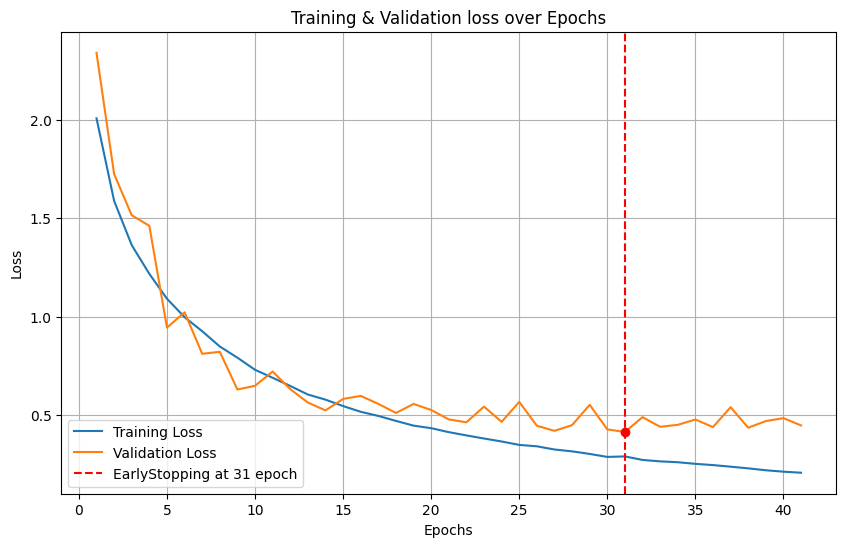

In [5]:
ep1=len(history.epoch)-10
ep=range(1,len(history.history['val_loss'])+1)
plt.figure(figsize=(10,6))
plt.plot(ep,history.history['loss'],label='Training Loss')
plt.plot(ep,history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axvline(x=ep1,linestyle='--',color='r',label=f'EarlyStopping at {ep1} epoch')
plt.scatter(ep1,history.history['val_loss'][ep1-1],zorder=5,color='r')
plt.grid(True)
plt.legend()
plt.title('Training & Validation loss over Epochs')
plt.show()

In [6]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8660 - loss: 0.4355


[0.432386577129364, 0.8637999892234802]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


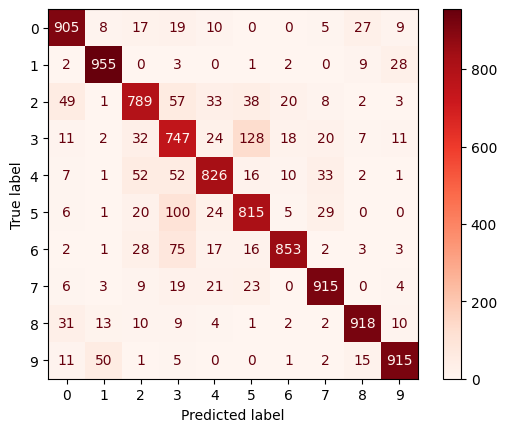

In [7]:
y_pred=model.predict(x_test).argmax(axis=1)
c=confusion_matrix(y_test,y_pred)
p=ConfusionMatrixDisplay(confusion_matrix=c)
p.plot(cmap='Reds')

In [8]:
cl=classification_report(y_test,y_pred,output_dict=True)
report=pd.DataFrame.from_dict(cl).T
print(report)

              precision  recall  f1-score     support
0              0.878641  0.9050  0.891626   1000.0000
1              0.922705  0.9550  0.938575   1000.0000
2              0.823591  0.7890  0.805924   1000.0000
3              0.687845  0.7470  0.716203   1000.0000
4              0.861314  0.8260  0.843287   1000.0000
5              0.785164  0.8150  0.799804   1000.0000
6              0.936334  0.8530  0.892726   1000.0000
7              0.900591  0.9150  0.907738   1000.0000
8              0.933876  0.9180  0.925870   1000.0000
9              0.929878  0.9150  0.922379   1000.0000
accuracy       0.863800  0.8638  0.863800      0.8638
macro avg      0.865994  0.8638  0.864413  10000.0000
weighted avg   0.865994  0.8638  0.864413  10000.0000
